In [15]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from test import ProfileReport
from typing import Any, Dict, Optional
import io
import base64

%matplotlib inline

In [16]:
data_name = 'melb_data.csv'
DATA_PATH = os.path.join(os.getcwd(), "data","input",data_name)
df = pd.read_csv(DATA_PATH)
profile = ProfileReport(df, title="Pandas Profiling Report")
value = profile.run()
config = profile.get_config()
summarizer = profile.get_summarizer()
typeset = profile.get_typeset()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [17]:
value.keys()

dict_keys(['analysis', 'table', 'variables', 'scatter', 'correlations', 'missing', 'alerts', 'package', 'sample', 'duplicates'])

In [18]:
value['analysis']

{'title': 'Pandas Profiling Report',
 'date_start': datetime.datetime(2023, 5, 5, 8, 9, 24, 950748),
 'date_end': datetime.datetime(2023, 5, 5, 8, 9, 29, 89732),
 'duration': datetime.timedelta(seconds=4, microseconds=138984)}

#### Overview

In [19]:
value['table']

{'n': 13580,
 'n_var': 21,
 'memory_size': 2281572,
 'record_size': 168.0097201767305,
 'n_cells_missing': 13256,
 'n_vars_with_missing': 4,
 'n_vars_all_missing': 0,
 'p_cells_missing': 0.04648292306613367,
 'types': {'Categorical': 8, 'Numeric': 13},
 'n_duplicates': 0,
 'p_duplicates': 0.0}

#### Variables
* Get statistics per variable / column
* More details, everything is a key value pair

In [20]:
value['variables'].keys()

dict_keys(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'])

In [21]:
value['variables']['Suburb'].keys()

dict_keys(['n_distinct', 'p_distinct', 'is_unique', 'n_unique', 'p_unique', 'type', 'hashable', 'value_counts_without_nan', 'value_counts_index_sorted', 'ordering', 'n_missing', 'n', 'p_missing', 'count', 'memory_size', 'imbalance', 'first_rows', 'chi_squared', 'max_length', 'mean_length', 'median_length', 'min_length', 'length_histogram', 'histogram_length', 'n_characters_distinct', 'n_characters', 'character_counts', 'category_alias_values', 'block_alias_values', 'block_alias_counts', 'n_block_alias', 'block_alias_char_counts', 'script_counts', 'n_scripts', 'script_char_counts', 'category_alias_counts', 'n_category', 'category_alias_char_counts', 'word_counts'])

In [22]:
value['variables']['Suburb']['chi_squared']

{'statistic': 22003.506627393224, 'pvalue': 0.0}

#### Scatter & Missing need Edits on points

In [23]:
value.keys()

dict_keys(['analysis', 'table', 'variables', 'scatter', 'correlations', 'missing', 'alerts', 'package', 'sample', 'duplicates'])

In [41]:
value['missing']['bar']['matrix']

'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="720pt" height="360pt" viewBox="0 0 720 360" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2023-05-05T18:09:28.651069</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.6.3, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <path d="M 0 36

#### Scatter - For Interactions Graph

In [24]:
from plotter import get_scatter_plot, get_scatter_tasks # adapted from ydata_profiling
from tqdm import tqdm
from datetime import datetime
from ydata_profiling.model.summary import get_series_descriptions

In [25]:
with tqdm(
    total=5,
    desc="Summarize dataset",
    disable=not True,
    position=0,
) as pbar:
        date_start = datetime.utcnow()
        pbar.total += len(df.columns)
        
        series_description = get_series_descriptions(
            config, df, summarizer, typeset, pbar
        )

        pbar.set_postfix_str("Get variable types")
        pbar.total += 1
        variables = {
            column: description["type"]
            for column, description in series_description.items()
        }
        supported_columns = [
            column
            for column, type_name in variables.items()
            if type_name != "Unsupported"
        ]
        interval_columns = [
            column
            for column, type_name in variables.items()
            if type_name in {"Numeric", "TimeSeries"}
        ]
scatter_tasks = get_scatter_tasks(config, interval_columns)
pbar.total += len(scatter_tasks)
scatter_matrix: Dict[Any, Dict[Any, Any]] = {
    x: {y: None} for x, y in scatter_tasks
}
for x, y in scatter_tasks:
    scatter_matrix[x][y] = get_scatter_plot(config, df, x, y, interval_columns)

Summarize dataset:  78%|███████▊  | 21/27 [00:00<00:00, 35.08it/s, Get variable types]             


In [26]:
base64_string = scatter_matrix['Rooms']['Propertycount']

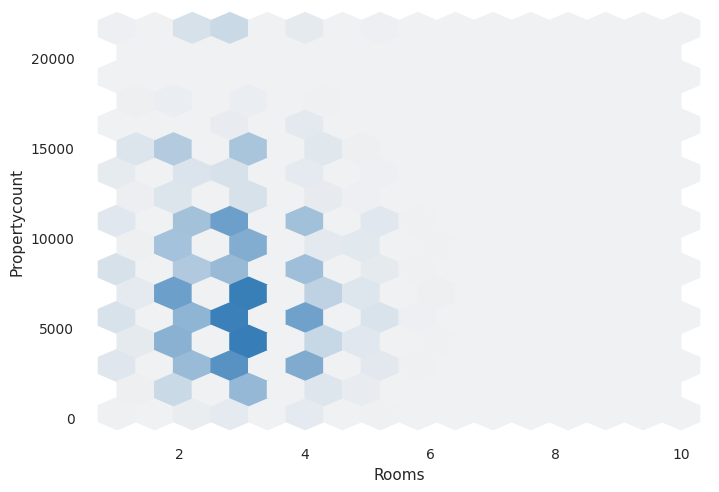

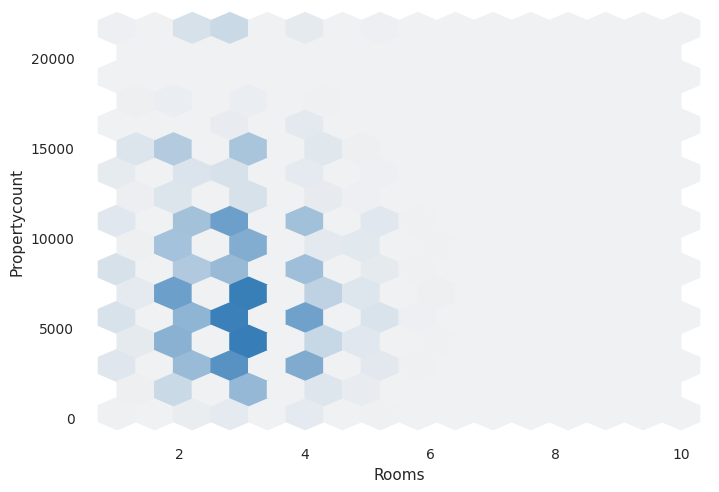

In [27]:
import pickle
pickle.loads(base64_string)

#### Correlations

In [28]:
value['correlations']

{'auto':                   Rooms     Price  Distance  Postcode  Bedroom2  Bathroom  \
 Rooms          1.000000  0.539886  0.351416  0.029471  0.959668  0.586860   
 Price          0.539886  1.000000 -0.129990  0.229903  0.524029  0.427199   
 Distance       0.351416 -0.129990  1.000000  0.209811  0.358071  0.156650   
 Postcode       0.029471  0.229903  0.209811  1.000000  0.034787  0.124291   
 Bedroom2       0.959668  0.524029  0.358071  0.034787  1.000000  0.580364   
 Bathroom       0.586860  0.427199  0.156650  0.124291  0.580364  1.000000   
 Car            0.476219  0.288263  0.347235  0.056521  0.477307  0.372330   
 Landsize       0.485742  0.327200  0.417379  0.061388  0.479792  0.212134   
 BuildingArea   0.775193  0.631425  0.287116  0.078542  0.761968  0.650893   
 YearBuilt     -0.072058 -0.368080  0.228634 -0.029741 -0.058499  0.202215   
 Lattitude      0.037347 -0.260322 -0.009697 -0.587603  0.039482 -0.080748   
 Longtitude     0.133109  0.261787  0.311872  0.679639  

In [29]:
value.keys()

dict_keys(['analysis', 'table', 'variables', 'scatter', 'correlations', 'missing', 'alerts', 'package', 'sample', 'duplicates'])

#### Alerts

In [30]:
value['alerts']

[[HIGH_CARDINALITY] alert on column Suburb,
 [HIGH_CARDINALITY] alert on column Address,
 [HIGH_CARDINALITY] alert on column SellerG,
 [HIGH_CARDINALITY] alert on column Date,
 [HIGH_CORRELATION] alert on column Rooms,
 [HIGH_CORRELATION] alert on column Price,
 [HIGH_CORRELATION] alert on column Distance,
 [HIGH_CORRELATION] alert on column Postcode,
 [HIGH_CORRELATION] alert on column Bedroom2,
 [HIGH_CORRELATION] alert on column Bathroom,
 [HIGH_CORRELATION] alert on column BuildingArea,
 [HIGH_CORRELATION] alert on column Lattitude,
 [HIGH_CORRELATION] alert on column Longtitude,
 [HIGH_CORRELATION] alert on column CouncilArea,
 [HIGH_CORRELATION] alert on column Regionname,
 [MISSING] alert on column BuildingArea,
 [MISSING] alert on column YearBuilt,
 [MISSING] alert on column CouncilArea,
 [SKEWED] alert on column Landsize,
 [SKEWED] alert on column BuildingArea,
 [UNIFORM] alert on column Address,
 [ZEROS] alert on column Car,
 [ZEROS] alert on column Landsize]

#### Package
* Metadata on what to run for things

In [31]:
value['package']

{'ydata_profiling_version': 'v4.1.2',
 'ydata_profiling_config': '{"title": "Pandas Profiling Report", "dataset": {"description": "", "creator": "", "author": "", "copyright_holder": "", "copyright_year": "", "url": ""}, "variables": {"descriptions": {}}, "infer_dtypes": true, "show_variable_description": true, "pool_size": 0, "progress_bar": true, "vars": {"num": {"quantiles": [0.05, 0.25, 0.5, 0.75, 0.95], "skewness_threshold": 20, "low_categorical_threshold": 5, "chi_squared_threshold": 0.999}, "cat": {"length": true, "characters": true, "words": true, "cardinality_threshold": 50, "imbalance_threshold": 0.5, "n_obs": 5, "chi_squared_threshold": 0.999, "coerce_str_to_date": false, "redact": false, "histogram_largest": 50, "stop_words": []}, "image": {"active": false, "exif": true, "hash": true}, "bool": {"n_obs": 3, "imbalance_threshold": 0.5, "mappings": {"t": true, "f": false, "yes": true, "no": false, "y": true, "n": false, "true": true, "false": false}}, "path": {"active": false}

In [32]:
value.keys()

dict_keys(['analysis', 'table', 'variables', 'scatter', 'correlations', 'missing', 'alerts', 'package', 'sample', 'duplicates'])

#### Sample
* Show Head
* Show Tail

In [33]:
value['sample']

[Sample(id='head', data=       Suburb             Address  Rooms Type      Price Method SellerG  \
 0  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
 1  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
 2  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   
 3  Abbotsford    40 Federation La      3    h   850000.0     PI  Biggin   
 4  Abbotsford         55a Park St      4    h  1600000.0     VB  Nelson   
 5  Abbotsford      129 Charles St      2    h   941000.0      S  Jellis   
 6  Abbotsford        124 Yarra St      3    h  1876000.0      S  Nelson   
 7  Abbotsford       98 Charles St      2    h  1636000.0      S  Nelson   
 8  Abbotsford  6/241 Nicholson St      1    u   300000.0      S  Biggin   
 9  Abbotsford       10 Valiant St      2    h  1097000.0      S  Biggin   
 
         Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
 0  3/12/2016       2.5    3067.0  ...       1.0  1.0     

#### Duplicates
* Show any duplicates in data

In [34]:
value['duplicates']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,# duplicates


In [35]:
profile